### Example 1

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mt_cars = pd.read_csv("mtcars.csv")
mt_cars.rename(columns={'Unnamed: 0':'brand'}, inplace= True)
mt_cars.head()

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


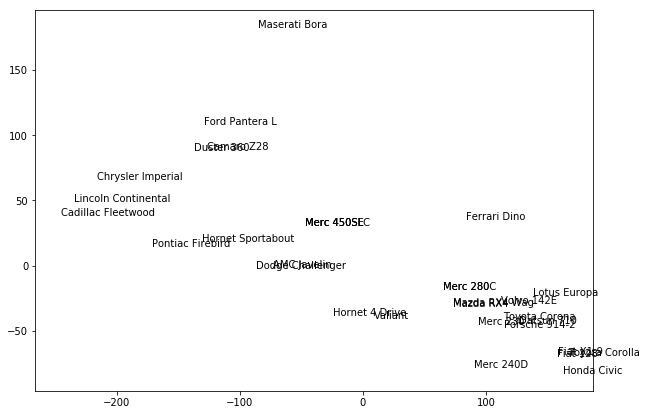

In [107]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances as ed

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
dist = ed(mt_cars.iloc[:,1:], mt_cars.iloc[:,1:]) # euclidean distance between rows 
result = mds.fit_transform(dist)

plt.figure(figsize=(10, 7)) 
plt.scatter(result[:,0],result[:,1], alpha=0)
for label, x, y in zip(mt_cars['brand'].values,result[:,0],result[:,1]):
    plt.annotate(label, xy=(x,y))

### Example 2

In [116]:
cities = pd.read_csv("eurodist.csv",index_col=0)
cities.head()

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
city,,,,,,,,,,,,,,,,,,,,,
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588


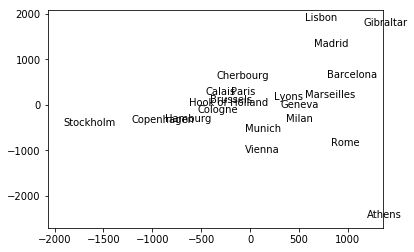

In [123]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
result = mds.fit_transform(cities)
plt.scatter(result[:,0],result[:,1], alpha=0)
#plt.axis('off')
for label, x, y in zip(cities.columns,result[:,0],result[:,1]):
    plt.annotate(label, xy=(x,y))